In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

# Load the data

In [2]:
import pandas as pd
df = pd.read_csv('weatherDef.csv')
df

,Loc,MinT,MaxT,Rain,WDir,WSpeed,WDir9,WDir3,WSpeed9,WSpeed3,Hum9,Hum3,Press9,Press3,Temp9,Temp3,Rtod,RTom
0,0,10.0,26.2,0.0,14,37,0,14,4,20,67,25,1013.8,1011.8,17.1,24.9,0,0
1,0,14.3,21.6,19.2,15,50,14,15,9,28,98,44,1011.8,1010.3,14.5,20.2,1,0
2,0,0.2,13.6,0.0,14,30,2,13,7,19,100,50,1022.9,1020.5,4.0,13.0,0,0
3,0,17.5,30.0,1.0,12,43,0,13,6,30,75,35,1005.4,1000.5,22.2,28.4,0,0
4,0,15.2,26.3,0.0,13,43,15,13,20,26,54,24,1010.9,1009.8,19.4,24.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23167,46,8.0,15.2,2.4,15,39,14,15,11,22,85,64,1020.0,1021.1,11.2,12.4,1,1
23168,46,7.0,20.1,0.0,15,46,5,13,19,15,65,94,1019.9,1018.6,14.8,14.0,0,1
23169,46,9.8,17.3,0.0,5,52,5,5,20,15,81,65,1017.8,1012.5,13.8,16.5,0,1
23170,46,3.6,15.1,0.6,3,37,4,7,6,13,96,54,1019.6,1019.3,7.3,13.3,0,1


In [3]:
columnas = df.columns
X = df[columnas[:-1]]
y = df[columnas[-1]]

In [4]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing for Decision Trees

The best way to preprocess Decision Trees is to do one hot encoding on the categorical classes, so we will do one hot encoding on Loc, WDir, WDir9, WDir3.

In [5]:
columnas = ['Loc', 'WDir', 'WDir9', 'WDir3']
for columna in columnas:
    aux = pd.get_dummies(X[columna], prefix=columna)
    X = X.drop(columns = [columna])
    X = pd.concat([X, aux], axis=1)

In [6]:
X

,MinT,MaxT,Rain,WSpeed,WSpeed9,WSpeed3,Hum9,Hum3,Press9,Press3,...,WDir3_6,WDir3_7,WDir3_8,WDir3_9,WDir3_10,WDir3_11,WDir3_12,WDir3_13,WDir3_14,WDir3_15
0,10.0,26.2,0.0,37,4,20,67,25,1013.8,1011.8,...,0,0,0,0,0,0,0,0,1,0
1,14.3,21.6,19.2,50,9,28,98,44,1011.8,1010.3,...,0,0,0,0,0,0,0,0,0,1
2,0.2,13.6,0.0,30,7,19,100,50,1022.9,1020.5,...,0,0,0,0,0,0,0,1,0,0
3,17.5,30.0,1.0,43,6,30,75,35,1005.4,1000.5,...,0,0,0,0,0,0,0,1,0,0
4,15.2,26.3,0.0,43,20,26,54,24,1010.9,1009.8,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23167,8.0,15.2,2.4,39,11,22,85,64,1020.0,1021.1,...,0,0,0,0,0,0,0,0,0,1
23168,7.0,20.1,0.0,46,19,15,65,94,1019.9,1018.6,...,0,0,0,0,0,0,0,1,0,0
23169,9.8,17.3,0.0,52,20,15,81,65,1017.8,1012.5,...,0,0,0,0,0,0,0,0,0,0
23170,3.6,15.1,0.6,37,6,13,96,54,1019.6,1019.3,...,0,1,0,0,0,0,0,0,0,0


# Decision Trees

## No preprocessing 

In [7]:
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeClassifier

cv = 5
iter = 50

param = {'criterion':['gini', 'entropy'], 
         'max_depth':[None, 2, 3, 4, 5, 6, 7, 8, 9],
         'min_samples_leaf':[1,2,3,5,10], 
         'splitter': ['best', 'random'], 
         'max_leaf_nodes':[5, 10, 20, 30]}

dt =  DecisionTreeClassifier(random_state=0)
dt_bs1 =  BayesSearchCV(dt,param,n_iter=iter, cv=cv, n_jobs=-1, refit=True, random_state=0)
dt_bs1.fit(X_train1, y_train1);

In [8]:
show_html(pd.DataFrame(dt_bs1.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
21,"{'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'splitter': 'best'}",0.742838,1
42,"{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 30, 'min_samples_leaf': 10, 'splitter': 'best'}",0.742838,1
47,"{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 30, 'min_samples_leaf': 10, 'splitter': 'best'}",0.742838,1
23,"{'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'splitter': 'best'}",0.742838,1
39,"{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 30, 'min_samples_leaf': 5, 'splitter': 'best'}",0.742838,1


              precision    recall  f1-score   support

           0       0.66      0.71      0.69      1861
           1       0.80      0.76      0.78      2774

    accuracy                           0.74      4635
   macro avg       0.73      0.74      0.73      4635
weighted avg       0.74      0.74      0.74      4635



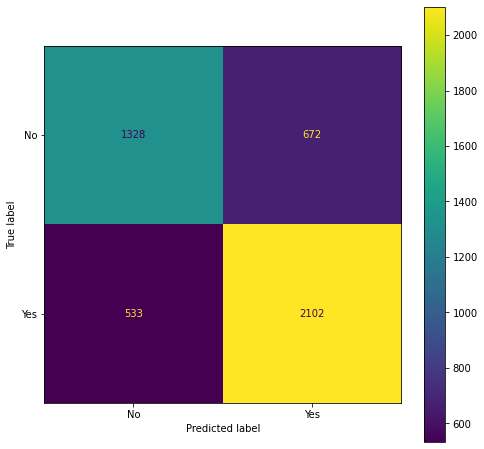

In [9]:
from sklearn.metrics import  ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print(classification_report(dt_bs1.predict(X_test1), y_test1))

plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(dt_bs1, X_test1,y_test1, display_labels=['No', 'Yes'], ax=plt.subplot());

C:\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


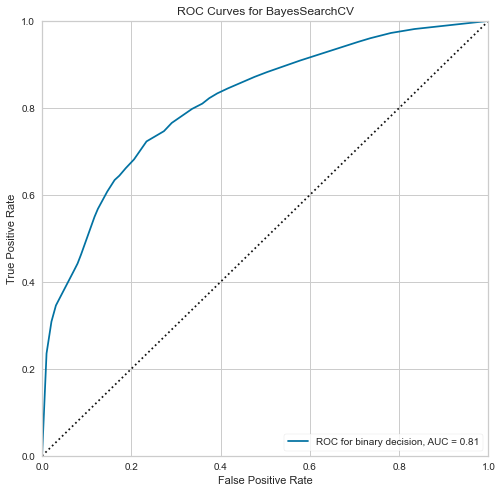

In [10]:
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8));
roc_auc(dt_bs1, X_train1, y_train1, X_test1, y_test1, binary=True, classes=['No', 'Yes']);

C:\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


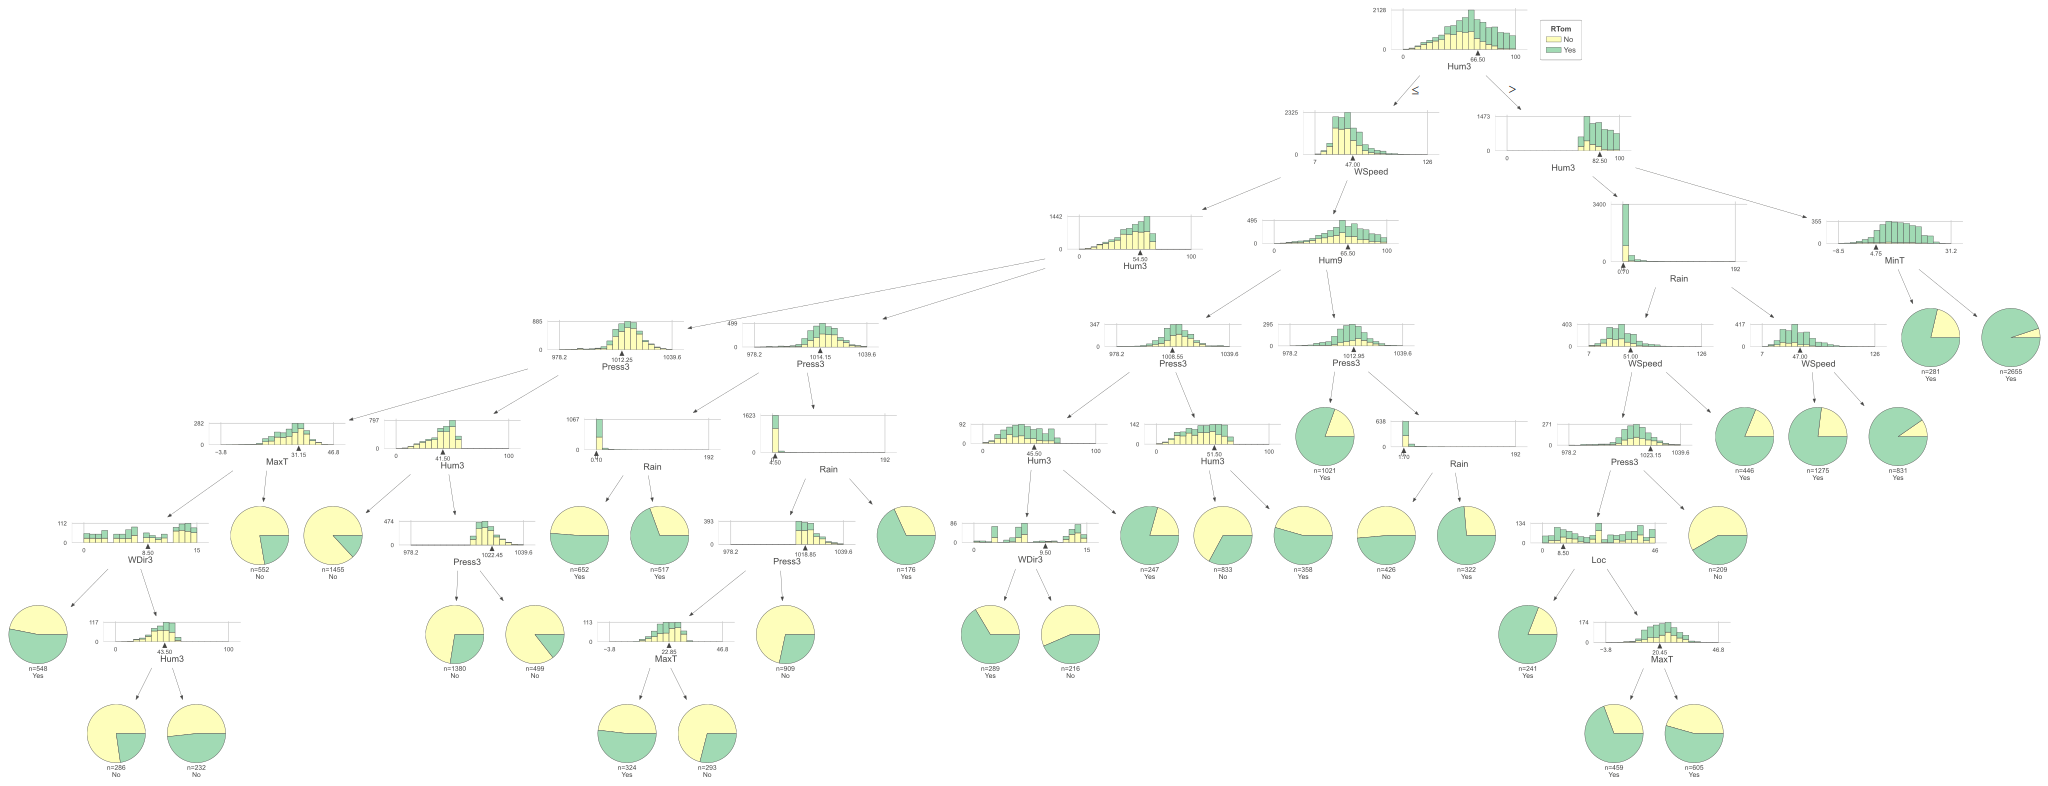

In [11]:
import dtreeviz

viz_model = dtreeviz.model(dt_bs1.best_estimator_,
                           X_train=X_train1, y_train=y_train1,
                           feature_names=X_train1.columns,
                           target_name='RTom',
                           class_names=['No', 'Yes'])

viz_model.view()

v = viz_model.view()     # render as SVG into internal object 
v.save("treeNoPreprocessing.svg")

## Preprocessing

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
cv = 5
iter=40

param = {'criterion':['gini', 'entropy'], 
         'max_depth':[None, 2, 3, 4, 5, 6, 7, 8, 9],
         'min_samples_leaf':[1,2,3,5,10], 
         'splitter': ['best', 'random'], 
         'max_leaf_nodes':[5, 10, 20, 30]}

dt =  DecisionTreeClassifier(random_state=0)
dt_bs =  BayesSearchCV(dt,param,n_iter=iter, cv=cv, n_jobs=-1, refit=True, random_state=0)
dt_bs.fit(X_train, y_train);

In [14]:
show_html(pd.DataFrame(dt_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
28,"{'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 30, 'min_samples_leaf': 10, 'splitter': 'best'}",0.743971,1
30,"{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 30, 'min_samples_leaf': 10, 'splitter': 'best'}",0.743971,1
37,"{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'splitter': 'best'}",0.743971,1
21,"{'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'splitter': 'best'}",0.740573,4
23,"{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'splitter': 'best'}",0.740357,5


              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1875
           1       0.80      0.76      0.78      2760

    accuracy                           0.75      4635
   macro avg       0.74      0.74      0.74      4635
weighted avg       0.75      0.75      0.75      4635



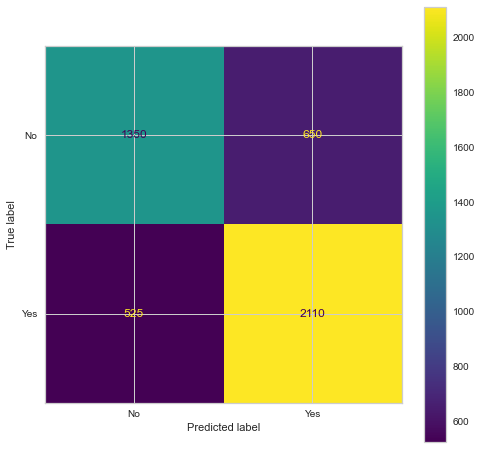

In [15]:
print(classification_report(dt_bs.predict(X_test), y_test))

plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(dt_bs, X_test,y_test, display_labels=['No', 'Yes'], ax=plt.subplot());

C:\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


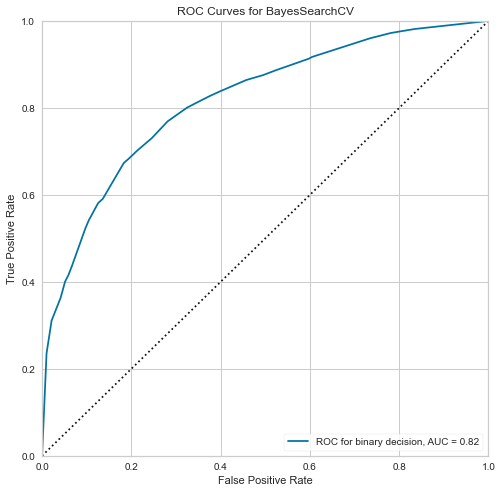

In [16]:
plt.figure(figsize=(8,8));
roc_auc(dt_bs, X_train, y_train, X_test, y_test, binary=True, classes=['No', 'Yes']);

C:\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


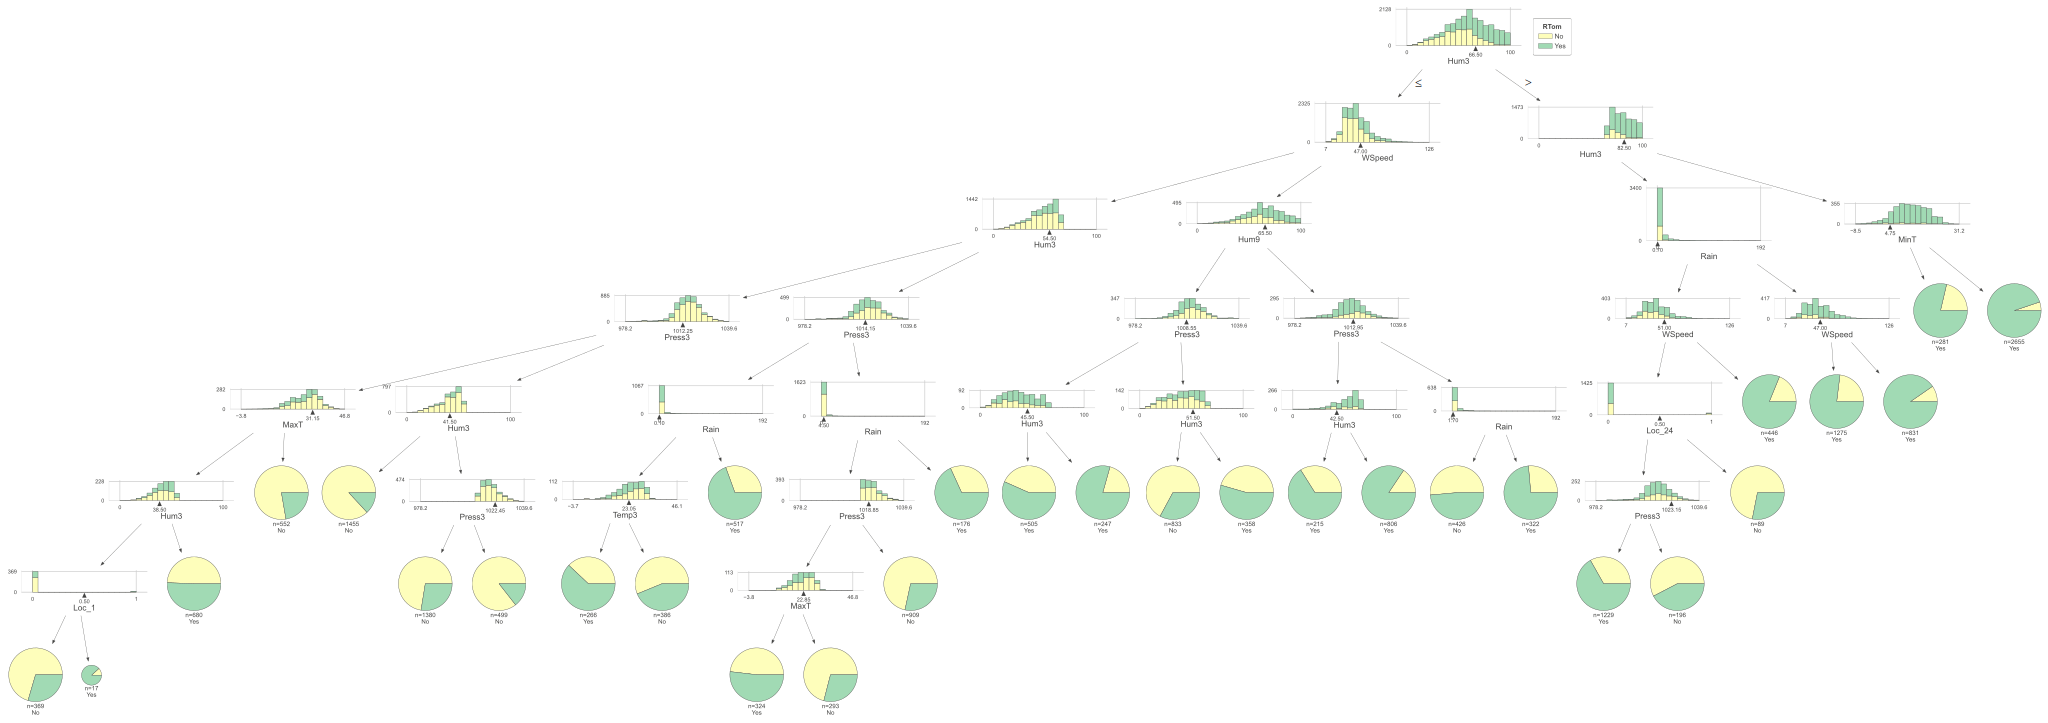

In [17]:
import dtreeviz

viz_model = dtreeviz.model(dt_bs.best_estimator_,
                           X_train=X_train, y_train=y_train,
                           feature_names=X_train.columns,
                           target_name='RTom',
                           class_names=['No', 'Yes'])

viz_model.view()

v = viz_model.view()     # render as SVG into internal object 
v.save("treePreprocessing.svg")

In [38]:
predicted = dt_bs.predict(X_test.iloc[[0]])
predicted

array([1], dtype=int64)

In [39]:
y_test.iloc[[0]]

6809    1
Name: RTom, dtype: int64

We woul see the path of a row in the best decision tree.

In [40]:
X_test.iloc[[0]]

,MinT,MaxT,Rain,WSpeed,WSpeed9,WSpeed3,Hum9,Hum3,Press9,Press3,...,WDir3_6,WDir3_7,WDir3_8,WDir3_9,WDir3_10,WDir3_11,WDir3_12,WDir3_13,WDir3_14,WDir3_15
6809,11.1,23.4,0.0,52,20,26,50,36,1013.4,1008.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
camino = dt_bs.best_estimator_.decision_path(X_test.iloc[[0]], check_input=True)

In [42]:
print(camino)

  (0, 0)	1
  (0, 1)	1
  (0, 4)	1
  (0, 9)	1
  (0, 15)	1
  (0, 41)	1


As we can see, it follows the next path:

    1. In the root, he follows the path on the left, the value of Hum3 <= 66.5
    2. Then it takes the path on the right, the value of WSpeed > 47
    3. It takes the left path, the value of Hum9 <= 65.5
    4. The left path again, the value of Press3 <= 1008.55
    5. Finally, is going to be classified as 'YES' because the value of Hum3 <= 45.5, in that case, both leafs will classify the row as 'YES'.

# With weights in classes

## No preprocessing

In [23]:
param = {'criterion':['gini', 'entropy'], 
         'max_depth':[None, 2, 3, 4, 5, 6, 7, 8, 9],
         'min_samples_leaf':[1,2,3,5,10], 
         'splitter': ['best', 'random'], 
         'max_leaf_nodes':[5, 10, 20, 30]}

dt1 =  DecisionTreeClassifier(random_state=0, class_weight="balanced")
dt_cw_bs1 =  BayesSearchCV(dt1,param,n_iter=iter, cv=cv, n_jobs=-1, refit=True, random_state=0)
dt_cw_bs1.fit(X_train1, y_train1);

In [24]:
show_html(pd.DataFrame(dt_cw_bs1.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
8,"{'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'splitter': 'best'}",0.736203,1
2,"{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'splitter': 'best'}",0.735556,2
31,"{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'splitter': 'best'}",0.735556,2
32,"{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'splitter': 'best'}",0.735556,2
34,"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'splitter': 'best'}",0.735556,2


              precision    recall  f1-score   support

           0       0.69      0.69      0.69      2008
           1       0.76      0.76      0.76      2627

    accuracy                           0.73      4635
   macro avg       0.72      0.72      0.72      4635
weighted avg       0.73      0.73      0.73      4635



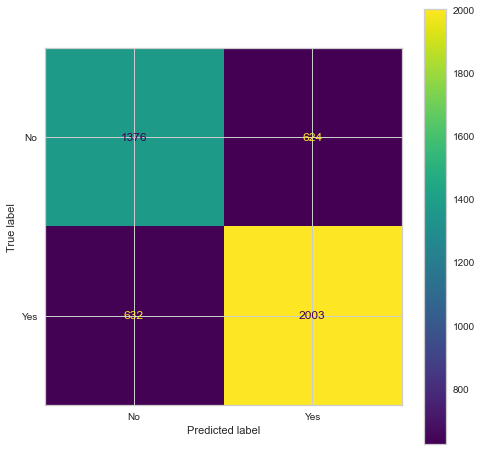

In [25]:
print(classification_report(dt_cw_bs1.predict(X_test1), y_test1))

plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(dt_cw_bs1, X_test1,y_test1, display_labels=['No', 'Yes'], ax=plt.subplot());

C:\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


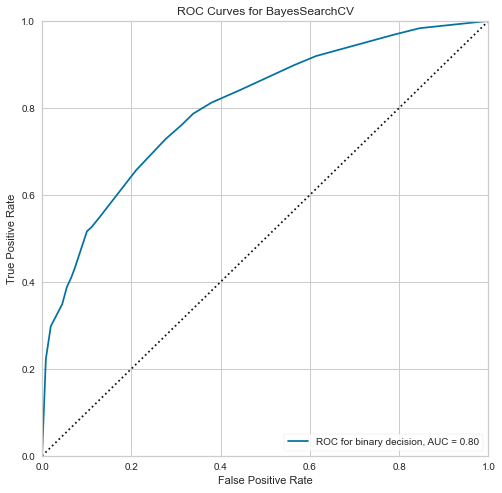

In [26]:
plt.figure(figsize=(8,8));
roc_auc(dt_cw_bs1, X_train1, y_train1, X_test1, y_test1, binary=True, classes=['No', 'Yes']);

C:\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


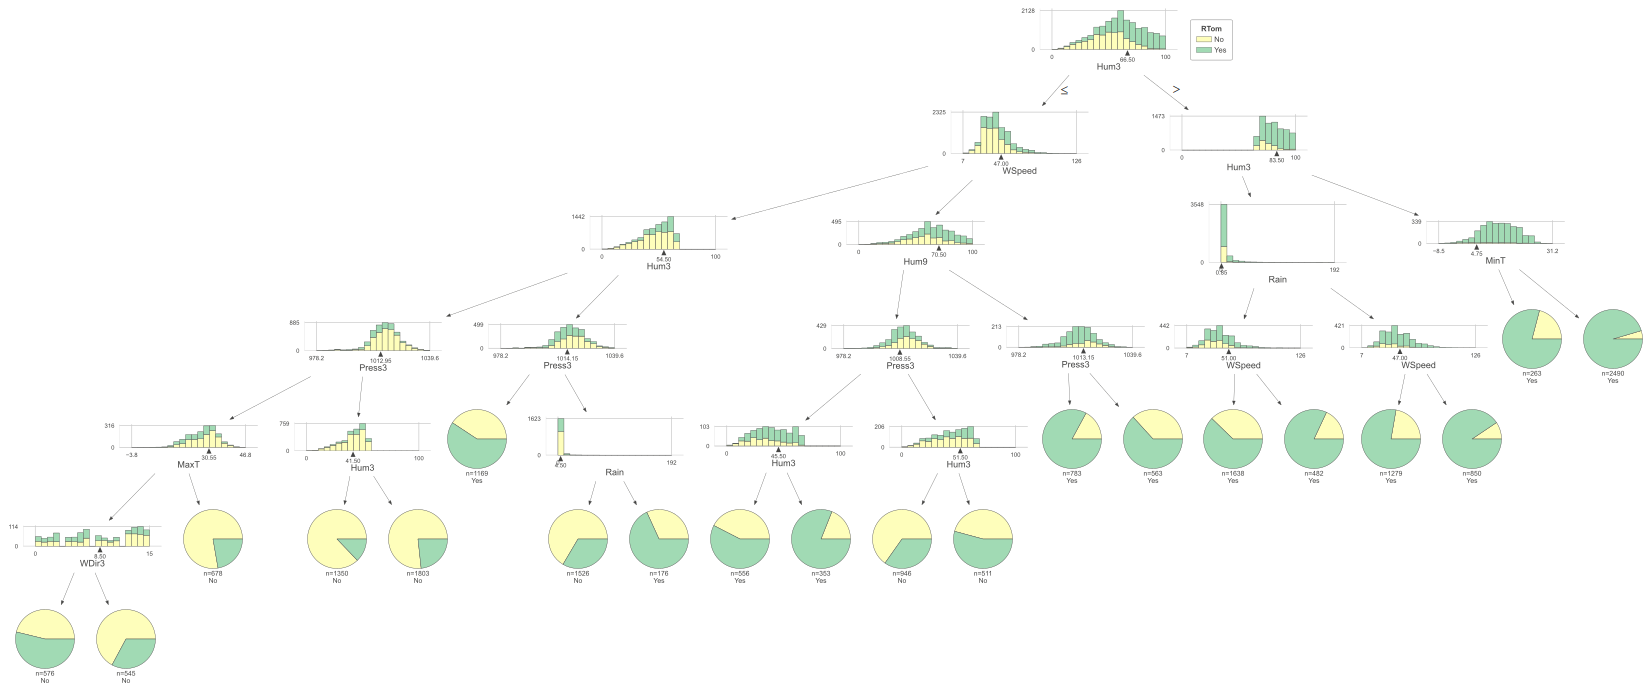

In [27]:
viz_model = dtreeviz.model(dt_cw_bs1.best_estimator_,
                           X_train=X_train1, y_train=y_train1,
                           feature_names=X_train1.columns,
                           target_name='RTom',
                           class_names=['No', 'Yes'])

viz_model.view()

v = viz_model.view()     # render as SVG into internal object 
v.save("treeWeightsNoPreprocessing.svg")

# Preprocessing

In [28]:
param = {'criterion':['gini', 'entropy'], 
         'max_depth':[None, 2, 3, 4, 5, 6, 7, 8, 9],
         'min_samples_leaf':[1,2,3,5,10], 
         'splitter': ['best', 'random'], 
         'max_leaf_nodes':[5, 10, 20, 30]}

dt =  DecisionTreeClassifier(random_state=0, class_weight="balanced")
dt_cw_bs =  BayesSearchCV(dt,param,n_iter=iter, cv=cv, n_jobs=-1, refit=True, random_state=0)
dt_cw_bs.fit(X_train, y_train);

In [29]:
show_html(pd.DataFrame(dt_cw_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
32,"{'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'splitter': 'best'}",0.737444,1
1,"{'criterion': 'entropy', 'max_depth': 9, 'max_leaf_nodes': 30, 'min_samples_leaf': 3, 'splitter': 'best'}",0.737444,1
28,"{'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': 30, 'min_samples_leaf': 10, 'splitter': 'best'}",0.737444,1
27,"{'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 30, 'min_samples_leaf': 10, 'splitter': 'best'}",0.737444,1
37,"{'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 30, 'min_samples_leaf': 10, 'splitter': 'best'}",0.737336,5


              precision    recall  f1-score   support

           0       0.78      0.66      0.72      2346
           1       0.70      0.81      0.75      2289

    accuracy                           0.73      4635
   macro avg       0.74      0.74      0.73      4635
weighted avg       0.74      0.73      0.73      4635



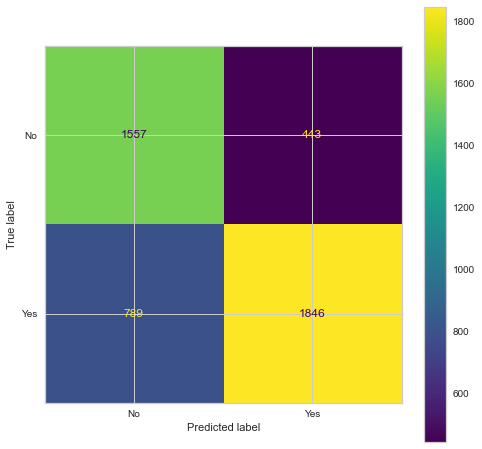

In [30]:
print(classification_report(dt_cw_bs.predict(X_test), y_test))

plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(dt_cw_bs, X_test,y_test, display_labels=['No', 'Yes'], ax=plt.subplot());

C:\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


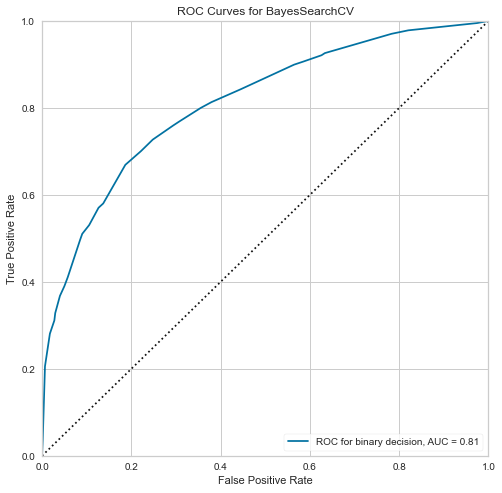

In [31]:
plt.figure(figsize=(8,8));
roc_auc(dt_cw_bs, X_train, y_train, X_test, y_test, binary=True, classes=['No', 'Yes']);

C:\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


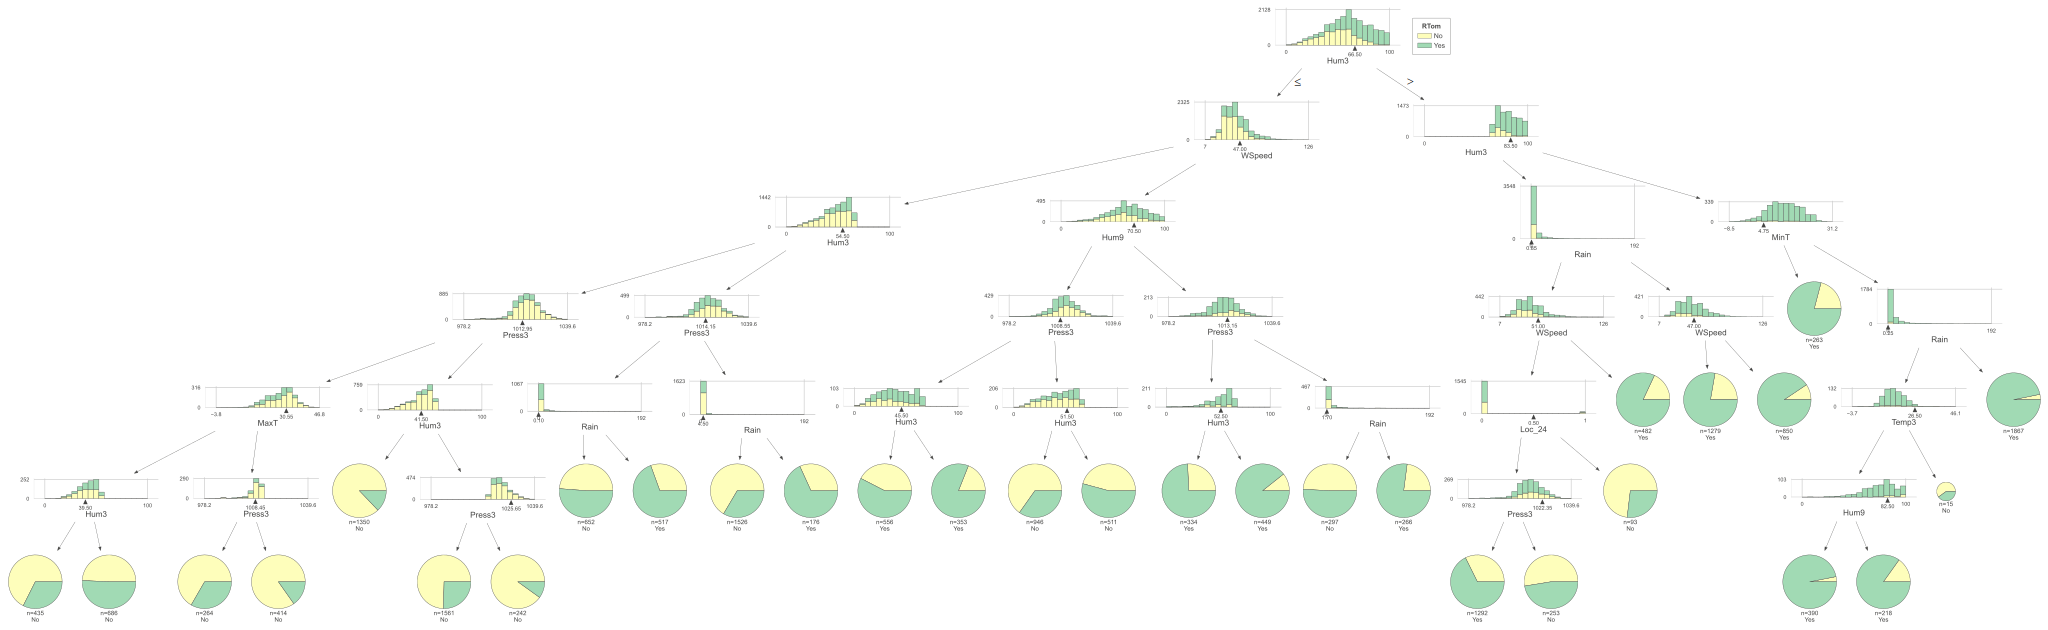

In [32]:
viz_model = dtreeviz.model(dt_cw_bs.best_estimator_,
                           X_train=X_train, y_train=y_train,
                           feature_names=X_train.columns,
                           target_name='RTom',
                           class_names=['No', 'Yes'])

viz_model.view()

v = viz_model.view()     # render as SVG into internal object 
v.save("treeWeightsPreprocessing.svg")

In [33]:
from glob import glob
ficheros = glob('./*.svg')
ficheros

['.\\treeNoPreprocessing.svg',
 '.\\treePreprocessing.svg',
 '.\\treeWeightsNoPreprocessing.svg',
 '.\\treeWeightsPreprocessing.svg']

In [34]:
from cairosvg import svg2png

for fichero in ficheros:
    with open(fichero, 'r') as f:
        contenido = f.read()
        svg2png(bytestring=contenido,write_to=fichero[:-4]+'.png')